<a href="https://colab.research.google.com/github/rodrigo103/AprendizajeAutomatico/blob/main/Copia_de_tp2_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Celeb_a analisys and model

## Import Dataset

In [4]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rodrigodata","key":"32d2966761abc9cc25ce7f5380ba68c5"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download jessicali9530/celeba-dataset
!unzip -d dataset celeba-dataset.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: dataset/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: dataset/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: dataset/img_align_celeba/img_align_c

In [7]:
!pip3 install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 5.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [8]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.2.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.8/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

In [12]:
# import packages
import PIL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image

%matplotlib inline

# 1.Data wrangling

## 1.1. Data loading

In [13]:
# This cell for the values that will be used across the entire notebook
# pathes
attr_data_path = "/content/dataset/list_attr_celeba.csv"
landmarks_data_path = "/content/dataset/list_landmarks_align_celeba.csv"
images_data_path = "/content/dataset/img_align_celeba/img_align_celeba"
eval_partition_data_path = "/content/dataset/list_eval_partition.csv"
bbox_data_path = "/content/dataset/list_bbox_celeba.csv"

In [14]:
# Since, the dataset is very huge. Hence, we will only select 1000 images
images_data_size = 1000

# original image dimensions
x_org = 178    # original x value
y_org = 218    # original y value

# new image dimensions
x_ = 108                             # new value of x
image_size_ratio = x_org / y_org    # dimensions ratio
y_ = int(image_size_ratio * x_)     # new value of y

# image sizes
original_image_size = (x_org, y_org)
new_image_size = (x_,y_)

# the image size that will be used in the training process
image_size_training = new_image_size

# check the new size value
new_image_size

(108, 88)

### 1.1.1. Loading the key points data

In [15]:
# load the dataset (key points)
df_org = pd.read_csv(landmarks_data_path)
df_org = df_org[:images_data_size]

# check
df_org.head(3)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158


In [16]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      1000 non-null   object
 1   lefteye_x     1000 non-null   int64 
 2   lefteye_y     1000 non-null   int64 
 3   righteye_x    1000 non-null   int64 
 4   righteye_y    1000 non-null   int64 
 5   nose_x        1000 non-null   int64 
 6   nose_y        1000 non-null   int64 
 7   leftmouth_x   1000 non-null   int64 
 8   leftmouth_y   1000 non-null   int64 
 9   rightmouth_x  1000 non-null   int64 
 10  rightmouth_y  1000 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 86.1+ KB


In [17]:
df_org.head(3)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158


### 1.1.2. Images data/ Converting images into an array

In [18]:
# convert images to arrays to use it in training
images_data = list()
for idx in range(df_org.shape[0]):
    # to get the path based on index
    path = "{}/{}".format(str(images_data_path),str(df_org.iloc[idx].image_id))
    
    # to read the image
    image = PIL.Image.open(path).resize(image_size_training)
    image_array = np.asarray(image) / 255
    
    # append the image array to images_data
    images_data.append(image_array)
    
# convert images_data to be array not list
images_data = np.array(images_data)

# check
images_data.shape

(1000, 88, 108, 3)

### 1.1.3. Plotting a sample image

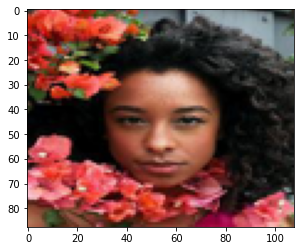

In [27]:
# Plotting a sample image
plt.imshow(images_data[43]);

In [20]:
print("Images Data Arrays Shape:", images_data.shape)
print("Key Points Data Shape:", df_org.shape)

Images Data Arrays Shape: (1000, 88, 108, 3)
Key Points Data Shape: (1000, 11)


## 1.2. Data Cleaning (Preprocessing)

In [21]:
# check if any landmark has null values
df_org.isnull().sum()

image_id        0
lefteye_x       0
lefteye_y       0
righteye_x      0
righteye_y      0
nose_x          0
nose_y          0
leftmouth_x     0
leftmouth_y     0
rightmouth_x    0
rightmouth_y    0
dtype: int64

In [22]:
# check the numerical values properties in the data
df_org.describe()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,69.263000,111.201000,107.722000,111.221000,87.774000,135.110000,71.161000,151.994000,105.717000,152.146000
std,1.740362,1.116174,1.682125,1.211456,6.758002,4.493338,3.217675,1.797553,3.344562,1.744054
min,62.000000,105.000000,96.000000,101.000000,65.000000,113.000000,61.000000,145.000000,92.000000,144.000000
25%,68.000000,111.000000,107.000000,111.000000,84.000000,133.000000,69.000000,151.000000,103.000000,151.000000
50%,69.000000,111.000000,108.000000,111.000000,88.000000,135.000000,72.000000,152.000000,105.000000,152.000000
75%,70.000000,112.000000,109.000000,112.000000,91.000000,138.000000,73.000000,153.000000,108.000000,153.000000
max,82.000000,118.000000,116.000000,116.000000,120.000000,146.000000,83.000000,164.000000,114.000000,162.000000


## 1.3. Images reading and plotting/ Reading images

In [23]:
# function to read images based on index
def image_array(index, size=image_size_training, path=images_data_path):
    """
    This functions is for converting images to arrays to deal with it in the model.
    
    Input:  index of the image that we want to convert to array
            size of the image that we want for the array of the image
            path of the images data to get the image
            
    Output: the image array as numpy array
    """
    # to get the path based on index
    path = "{}/{}".format(str(path),str(df_org.iloc[index].image_id))
    
    # to read the image
    image = PIL.Image.open(path).resize(size)
    image_array = np.asarray(image)
    
    return image_array

In [24]:
# function to get a list of all landmarks of the face
def image_key_points_list(index, df = df_org):
    """
    This function for getting the key points on the face as list to deal with it in plotting sections
    """
    # box dictionary
    points_list = [df.iloc[index].lefteye_x,
                   df.iloc[index].lefteye_y,
                   df.iloc[index].righteye_x,
                   df.iloc[index].righteye_y,
                   df.iloc[index].nose_x,
                   df.iloc[index].nose_y,
                   df.iloc[index].leftmouth_x,
                   df.iloc[index].leftmouth_y,
                   df.iloc[index].rightmouth_x,
                   df.iloc[index].rightmouth_y]
    
    return points_list

In [25]:
# function to plot the image with green box around the faces
def plotting_image_with_box(index, df = df_org, size=original_image_size):
    """
    This function for plotting the image with points on facial features and box around the face
    """
    test_image = image_array(index, size)
    points_list = image_key_points_list(index, df)
    
    # face points
    le_x, le_y, re_x, re_y = points_list[0], points_list[1], points_list[2], points_list[3]
    n_x, n_y = points_list[4], points_list[5]
    lm_x, lm_y, rm_x, rm_y = points_list[6], points_list[7], points_list[8], points_list[9]
    
    # Create figure and axes
    fig, ax = plt.subplots()
    # plot the image
    ax.imshow(test_image)
    # plot the points on the face
    ax.plot([le_x,re_x,n_x,lm_x,rm_x], [le_y,re_y,n_y,lm_y,rm_y], 'bo-')
    
    # plot the box around the face
    width = abs(le_x-rm_x-60)
    height = abs(le_y-rm_y-75)
    rect = patches.Rectangle((le_x-30, le_y-40), width, height, linewidth=4, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

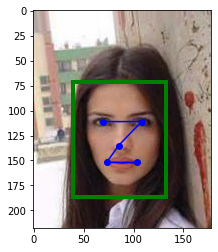

In [26]:
#plotting the image with facial key points
plotting_image_with_box(25)

In [ ]:
tf.keras.applications.ResNet50()